## Data Preprocessing

### Connect to drive

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
print(tf.__version__)

2.12.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# copy dataset from google drive to colab
!cp ./drive/My\ Drive/mushrooms.zip ./

In [ ]:
# unzip dataset in colab
!mkdir ./mushrooms
!unzip -q mushrooms.zip -d ./mushrooms

### Combining Files

In [ ]:
import os
from shutil import copyfile

In [ ]:
# use os.mkdir to create directories

try:
    os.mkdir('/content/temp')
    os.mkdir('/content/temp/edible')
    os.mkdir('/content/temp/poisonous') 
    
except OSError:
    pass

In [ ]:
# Don't run this! This is for Ming!
Edible1Names = os.listdir("/content/mushrooms/mushrooms/edible mushroom sporocarp")
Edible2Names = os.listdir("/content/mushrooms/mushrooms/edible sporocarp")
Poisonous1Names = os.listdir("/content/mushrooms/mushrooms/poisonous mushroom sporocarp")
Poisonous2Names = os.listdir("/content/mushrooms/mushrooms/poisonous sporocarp")

In [ ]:
Edible1Names = os.listdir("/content/mushrooms/edible mushroom sporocarp")
Edible2Names = os.listdir("/content/mushrooms/edible sporocarp")
Poisonous1Names = os.listdir("/content/mushrooms/poisonous mushroom sporocarp")
Poisonous2Names = os.listdir("/content/mushrooms/poisonous sporocarp")

In [ ]:
# Don't run this! This is for Ming!
SOURCE1 = "/content/mushrooms/mushrooms/edible mushroom sporocarp"
SOURCE2 = "/content/mushrooms/mushrooms/edible sporocarp"
SOURCE3 = "/content/mushrooms/mushrooms/poisonous mushroom sporocarp"
SOURCE4 = "/content/mushrooms/mushrooms/poisonous sporocarp"

In [ ]:
SOURCE1 = "/content/mushrooms/edible mushroom sporocarp"
SOURCE2 = "/content/mushrooms/edible sporocarp"
SOURCE3 = "/content/mushrooms/poisonous mushroom sporocarp"
SOURCE4 = "/content/mushrooms/poisonous sporocarp"

In [ ]:
for img in Edible1Names:
  copyfile(os.path.join(SOURCE1,img),os.path.join('/content/temp/edible',img))

for img in Edible2Names:
  copyfile(os.path.join(SOURCE2,img),os.path.join('/content/temp/edible',img))

for img in Poisonous1Names:
  copyfile(os.path.join(SOURCE3,img),os.path.join('/content/temp/poisonous',img))

for img in Poisonous2Names:
  copyfile(os.path.join(SOURCE4,img),os.path.join('/content/temp/poisonous',img))

In [ ]:
import pathlib

In [ ]:
data = pathlib.Path('/content/temp/') 

class_count = len(list(data.glob('*')))
print(class_count)

image_count = len(list(data.glob('*/*')))
print(image_count)

class_names = np.array([item.name for item in data.glob('*')])
print(class_names)

edible_count = len(list(data.glob('edible/*')))
print(edible_count)

poisonous_count = len(list(data.glob('poisonous/*')))
print(poisonous_count)

2
3401
['poisonous' 'edible']
1181
2220


### Sampling and Splitting Data
#### 1. training & testing

In [ ]:
training_size = 500 
testing_size = round(training_size/0.8 - training_size)
size = training_size + testing_size

edible_pct = round(edible_count/image_count, 2)
poisonous_pct = 1 - edible_pct

print("edible/all")
print(edible_pct)
print("poisonous/all")
print(poisonous_pct)

edible_size = round(edible_pct * size)
poisonous_size = round(poisonous_pct * size)

print("edible_size")
print(edible_size)
print("poisonous_size")
print(poisonous_size)

training_edible_size = round(training_size * edible_pct)
testing_edible_size = round(testing_size * edible_pct)

print("edible_training_size")
print(training_edible_size)
print("edible_testing_size")
print(testing_edible_size)

training_poisonous_size = training_size - training_edible_size
testing_poisonous_size = testing_size - testing_edible_size

print("poisonous_training_size")
print(training_poisonous_size)
print("poisonous_testing_size")
print(testing_poisonous_size)

edible/all
0.35
poisonous/all
0.65
edible_size
219
poisonous_size
406
edible_training_size
175
edible_testing_size
44
poisonous_training_size
325
poisonous_testing_size
81


In [ ]:
# updated ratios
## training: 50/50
## testing: 80/20
training_edible_size = 250
training_poisonous_size = 250
testing_edible_size = 62 
testing_poisonous_size = 63

ref: https://colab.research.google.com/github/mxn170019/TensorFlow_Exercises/blob/master/image_splitting_directory_image_conv_Custom_testing_.ipynb

In [ ]:
import random

In [ ]:
try:
    os.mkdir('/content/data')
    os.mkdir('/content/data/training')
    os.mkdir('/content/data/testing')
    os.mkdir('/content/data/training/edible')
    os.mkdir('/content/data/training/poisonous') 
    os.mkdir('/content/data/testing/edible')
    os.mkdir('/content/data/testing/poisonous')
    
except OSError:
    pass

def split_data(SOURCE, TRAINING, TESTING, TRAINING_SIZE, TESTING_SIZE):
  # a SOURCE directory containing the files
  # a TRAINING directory that a portion of the files will be copied to
  # a TESTING directory that a portion of the files will be copie to
    allFileNames = os.listdir(SOURCE)
    random.seed(221)
    training = random.sample(allFileNames, TRAINING_SIZE)
    testing = random.sample(list(set(allFileNames)-set(training)), TESTING_SIZE)
    
    for img in training:
      if os.path.getsize(os.path.join(SOURCE,img)) <= 0:
        print(img,' is zero length, so ignoring')
      else:
        copyfile(os.path.join(SOURCE,img),os.path.join(TRAINING,img))
    for img in testing:
      if os.path.getsize(os.path.join(SOURCE,img)) <= 0:
        print(img,' is zero length, so ignoring')
      else:
        copyfile(os.path.join(SOURCE,img),os.path.join(TESTING,img))
                       
EDIBLE_SOURCE_DIR = "/content/temp/edible/"
TRAINING_EDIBLE_DIR = "/content/data/training/edible"
TESTING_EDIBLE_DIR = "/content/data/testing/edible"

POISONOUS_SOURCE_DIR = "/content/temp/poisonous/"
TRAINING_POISONOUS_DIR = "/content/data/training/poisonous/"
TESTING_POISONOUS_DIR = "/content/data/testing/poisonous/" 

# training_edible_size
# testing_edible_size
# training_poisonous_size
# testing_poisonous_size

split_data(EDIBLE_SOURCE_DIR, TRAINING_EDIBLE_DIR, TESTING_EDIBLE_DIR, training_edible_size, testing_edible_size)
split_data(POISONOUS_SOURCE_DIR, TRAINING_POISONOUS_DIR, TESTING_POISONOUS_DIR, training_poisonous_size, testing_poisonous_size)

In [ ]:
print(len(os.listdir('/content/data/training/edible/')))
print(len(os.listdir('/content/data/testing/edible')))
print(len(os.listdir('/content/data/training/poisonous/')))
print(len(os.listdir('/content/data/testing/poisonous/')))

# Expections: 250, 62, 250, 62

250
62
250
63


In [ ]:
data = pathlib.Path('/content/data/') 

training_count = len(list(data.glob('training/*/*')))
print(training_count)

testing_count = len(list(data.glob('testing/*/*')))
print(testing_count)

class_names = np.array([item.name for item in data.glob('*')])
print(class_names)

500
125
['training' 'testing']


#### 2. edible & poisonous

In [ ]:
try:
    os.mkdir('/content/df')
    os.mkdir('/content/df/edible')
    os.mkdir('/content/df/poisonous')
    
except OSError:
    pass

def split_data2(SOURCE1, SOURCE2, CLASS1, CLASS2, CLASS1_SIZE, CLASS2_SIZE):
  # a SOURCE directory containing the files
  # a CLASS1 directory that a portion of the files will be copied to
  # a CLASS2 directory that a portion of the files will be copie to
    allFileNames1 = os.listdir(SOURCE1)
    allFileNames2 = os.listdir(SOURCE2)
    random.seed(221)
    class1 = random.sample(allFileNames1, CLASS1_SIZE)
    class2 = random.sample(allFileNames2, CLASS2_SIZE)
    
    for img in class1:
      if os.path.getsize(os.path.join(SOURCE1,img)) <= 0:
        print(img,' is zero length, so ignoring')
      else:
        copyfile(os.path.join(SOURCE1,img),os.path.join(CLASS1,img))
    for img in class2:
      if os.path.getsize(os.path.join(SOURCE2,img)) <= 0:
        print(img,' is zero length, so ignoring')
      else:
        copyfile(os.path.join(SOURCE2,img),os.path.join(CLASS2,img))
                       
EDIBLE_SOURCE_DIR = "/content/temp/edible/"
EDIBLE_DIR = "/content/df/edible"

POISONOUS_SOURCE_DIR = "/content/temp/poisonous/"
POISONOUS_DIR = "/content/df/poisonous/" 

# edible_size
# poisonous_size

split_data2(EDIBLE_SOURCE_DIR, POISONOUS_SOURCE_DIR, EDIBLE_DIR, POISONOUS_DIR, edible_size, poisonous_size)

In [ ]:
data = pathlib.Path('/content/df/') 

edible_count = len(list(data.glob('edible/*')))
print(edible_count)

poisonous_count = len(list(data.glob('poisonous/*')))
print(poisonous_count)

class_names = np.array([item.name for item in data.glob('*')])
print(class_names)

# Expections: 219, 406

219
406
['poisonous' 'edible']


In [ ]:
%rm -rf mushrooms.zip
%rm -rf mushrooms

### Converting to Matrices

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
TrainESource = "/content/data/training/edible/"
TrainPSource = "/content/data/training/poisonous/"
TestESource = "/content/data/testing/edible/"
TestPSource = "/content/data/testing/poisonous/"

In [ ]:
# Convert to RGB data
def image2matrices(source, label, width=200, height=200):
    '''
    Convert images to numpy array
        - source: the path of directory
        - label: "edible" or "poisonous"
    - width, height: size to rescale image
    '''
  
    name_list = os.listdir(source)
    flattened_arrays = []

    for image_name in name_list:
        # obtain each image and resize
        image_path = os.path.join(source, image_name)
        image = Image.open(image_path)
        image = image.convert('RGB')  # ensure 3-channel RGB
        scaled_image = image.resize((width, height))
        # convert to numpy array, normalize and flatten it
        image_array = np.array(scaled_image)
        normalized_array = image_array / 255.0
        flattened_array = normalized_array.reshape(-1)

        # save each array
        flattened_arrays.append(flattened_array)

    # add zero to ensure same length in each array
    max_length = max(len(arr) for arr in flattened_arrays)
    padded_arrays = [np.pad(arr, (0, max_length - len(arr)), mode='constant') for arr in flattened_arrays]

    # convert to matrix and create Y matrix
    X_matrix = np.vstack(padded_arrays)
    Y_matrix = np.full((X_matrix.shape[0], 1), label)

    return X_matrix, Y_matrix

In [ ]:
X_train_edible, Y_train_edible = image2matrices(TrainESource, "edible")
X_train_poisonous, Y_train_poisonous = image2matrices(TrainPSource, "poisonous")
X_test_edible, Y_test_edible = image2matrices(TestESource, "edible")
X_test_poisonous, Y_test_poisonous = image2matrices(TestPSource, "poisonous")

In [ ]:
X_train = np.vstack((X_train_edible, X_train_poisonous))
X_test = np.vstack((X_test_edible, X_test_poisonous))
Y_train = np.vstack((Y_train_edible, Y_train_poisonous))
Y_test = np.vstack((Y_test_edible, Y_test_poisonous))

In [ ]:
# for later use
y_test = Y_test
import pandas as pd
y_test = np.where(y_test == 'poisonous', 1, 0)
y_test = np.array(pd.DataFrame(y_test)[0])

In [ ]:
print(X_train.shape)  # n=500 p=200*200*3
print(Y_train.shape)  # n=500 p=1
print(X_test.shape)   # n=125 p=200*200*3
print(Y_test.shape)   # n=125 p=1

(500, 120000)
(500, 1)
(125, 120000)
(125, 1)


## Data Analysis

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# create random forest classifier
## initiate model
rf_classifier = RandomForestClassifier(random_state=2023)
## train model
rf_classifier.fit(X_train, Y_train.ravel())
## accuracy on training set
rf_accuracy = rf_classifier.score(X_train, Y_train.ravel())

print('Accuracy of Random Forest classifier on training set: {:.3f}'.format(rf_accuracy))

Accuracy of Random Forest classifier on training set: 1.000


#### Grid Search for Optimal Hyperparameters

In [ ]:
# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

In [ ]:
# define parameters
parameters = {
    'n_estimators': (50, 100, 200),
    'max_samples': (50, 100, 200),
    'max_features': ('sqrt', 'log2'),
    'criterion': ('entropy', 'gini', 'log_loss')
}   

In [ ]:
# Search for optimal hyperparameters
Grid_RF = GridSearchCV(RandomForestClassifier(random_state=2023), parameters, cv=5)

Grid_RF.fit(X_train, Y_train.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2023),
             param_grid={'criterion': ('entropy', 'gini', 'log_loss'),
                         'max_features': ('sqrt', 'log2'),
                         'max_samples': (50, 100, 200),
                         'n_estimators': (50, 100, 200)})

In [ ]:
print_grid_search_metrics(Grid_RF)

Best score: 0.606
Best parameters set:
criterion:gini
max_features:sqrt
max_samples:200
n_estimators:200


In [ ]:
# best model
best_RF_model = Grid_RF.best_estimator_

# predict outcomes on testing set
rf_Y_pred = best_RF_model.predict(X_test)

In [ ]:
# calculate accuracy
rf_accuracy = accuracy_score(Y_test, rf_Y_pred)
print("Accuracy:", rf_accuracy)

Accuracy: 0.648


In [ ]:
# obtain results
rf_report = classification_report(Y_test, rf_Y_pred)
print("Classification Report:\n", rf_report)

Classification Report:
               precision    recall  f1-score   support

      edible       0.63      0.69      0.66        62
   poisonous       0.67      0.60      0.63        63

    accuracy                           0.65       125
   macro avg       0.65      0.65      0.65       125
weighted avg       0.65      0.65      0.65       125



### Kernel SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
# create svm classifier
## initiate model
svm_classifier = SVC(random_state=2023)  
### default: kernel='rbf'

## train model
svm_classifier.fit(X_train, Y_train.ravel())

## accuracy on training set
svm_accuracy = svm_classifier.score(X_train, Y_train.ravel())

print('Accuracy of SVM classifier on training set: {:.3f}'.format(svm_accuracy))

Accuracy of SVM classifier on training set: 0.940


#### Grid Search for Optimal Hyperparameters

In [ ]:
# define parameters
parameters = {
    'C': (0.1, 1, 10),
    'gamma': (1, 0.1, 0.01),
    'kernel': ('rbf', 'poly', 'sigmoid')
    #'degree': (3, 5, 7, 9)
}

In [ ]:
# Search for optimal hyperparameters
Grid_SVM = GridSearchCV(SVC(random_state=2023), parameters, cv=5)

Grid_SVM.fit(X_train, Y_train.ravel())

GridSearchCV(cv=5, estimator=SVC(random_state=2023),
             param_grid={'C': (0.1, 1, 10), 'gamma': (1, 0.1, 0.01),
                         'kernel': ('rbf', 'poly', 'sigmoid')})

In [ ]:
#print_grid_search_metrics(Grid_SVM)

In [ ]:
print("Best score: " + str(Grid_SVM.best_score_))
print("Best parameters: "+ str(Grid_SVM.best_params_))

Best score: 0.552
Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}


In [ ]:
# best model
best_SVM_model = Grid_SVM.best_estimator_

# predict outcomes on testing set
svm_Y_pred = best_SVM_model.predict(X_test)

In [ ]:
# calculate accuracy
svm_accuracy = accuracy_score(Y_test, svm_Y_pred)
print("Accuracy:", svm_accuracy)

Accuracy: 0.656


In [ ]:
# obtain results
svm_report = classification_report(Y_test, svm_Y_pred)
print("Classification Report:\n", svm_report)

Classification Report:
               precision    recall  f1-score   support

      edible       0.67      0.61      0.64        62
   poisonous       0.65      0.70      0.67        63

    accuracy                           0.66       125
   macro avg       0.66      0.66      0.66       125
weighted avg       0.66      0.66      0.66       125



### CNN



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Reshape the data to fit the model
X_train = X_train.reshape(X_train.shape[0], 200, 200, 3)
X_test = X_test.reshape(X_test.shape[0], 200, 200, 3)

In [ ]:
# One-hot encoding for the labels
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

encoder = LabelEncoder()
encoder.fit(Y_train)
Y_train = encoder.transform(Y_train)
Y_test = encoder.transform(Y_test)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
# Create the model
model = Sequential()

# Add model layers

## first convolution layer: n1=64
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', kernel_initializer='he_uniform', input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

## second convolution layer: n2=32
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))

## single vector
model.add(Flatten())

## first fully connected layer: n3=128
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

## output layer: n4=2
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 99, 99, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 97, 97, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 73728)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
# Compile the model
model.compile(optimizer=Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10)
## default: batch_size=32

Epoch 1/10
16/16 [==============================] - 3s 73ms/step - loss: 4.1056 - accuracy: 0.5100 - val_loss: 0.6921 - val_accuracy: 0.5520
Epoch 2/10
16/16 [==============================] - 1s 48ms/step - loss: 0.6832 - accuracy: 0.5980 - val_loss: 0.6775 - val_accuracy: 0.5440
Epoch 3/10
16/16 [==============================] - 1s 48ms/step - loss: 0.6199 - accuracy: 0.6860 - val_loss: 0.7471 - val_accuracy: 0.5920
Epoch 4/10
16/16 [==============================] - 1s 48ms/step - loss: 0.4436 - accuracy: 0.8140 - val_loss: 0.7434 - val_accuracy: 0.6000
Epoch 5/10
16/16 [==============================] - 1s 49ms/step - loss: 0.2918 - accuracy: 0.8780 - val_loss: 0.7844 - val_accuracy: 0.5760
Epoch 6/10
16/16 [==============================] - 1s 48ms/step - loss: 0.1353 - accuracy: 0.9640 - val_loss: 0.9768 - val_accuracy: 0.6160
Epoch 7/10
16/16 [==============================] - 1s 49ms/step - loss: 0.0533 - accuracy: 0.9840 - val_loss: 1.1566 - val_accuracy: 0.6720
Epoch 8/10
16

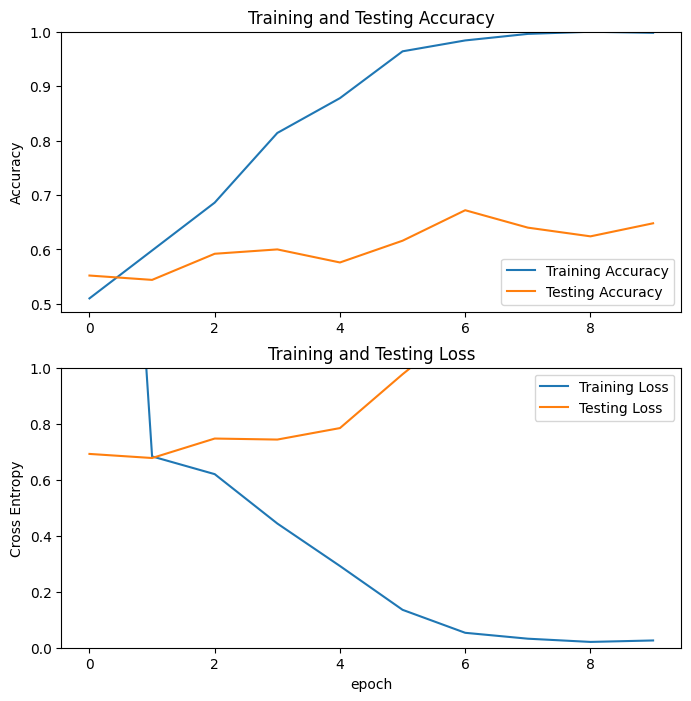

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Testing Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Testing Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Testing Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Testing Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy: ", accuracy)

4/4 [==============================] - 0s 17ms/step - loss: 1.6901 - accuracy: 0.6480
Test Accuracy:  0.6480000019073486


#### Transfer Learning

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, losses, Model

In [ ]:
base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape = (200,200,3))
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(base_model.output)
x = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation = 'softmax')(x)

In [ ]:
model2 = Model(inputs = base_model.input, outputs = predictions)
model2.compile(optimizer='adam', 
               loss='categorical_crossentropy', 
               metrics=['accuracy'])

In [ ]:
history2 = model2.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=32)

Epoch 1/10
16/16 [==============================] - 7s 202ms/step - loss: 5.6039 - accuracy: 0.4680 - val_loss: 0.6935 - val_accuracy: 0.4960
Epoch 2/10
16/16 [==============================] - 2s 103ms/step - loss: 0.7843 - accuracy: 0.4920 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 3/10
16/16 [==============================] - 2s 102ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 4/10
16/16 [==============================] - 2s 106ms/step - loss: 0.7102 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 5/10
16/16 [==============================] - 2s 129ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 6/10
16/16 [==============================] - 2s 127ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 7/10
16/16 [==============================] - 2s 104ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5040
Epoch 

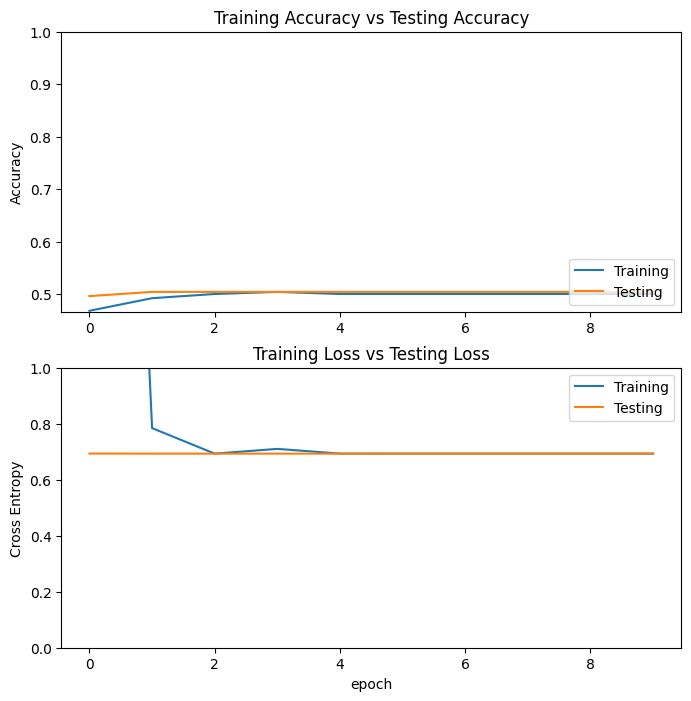

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training')
plt.plot(val_acc, label='Testing')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy vs Testing Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training')
plt.plot(val_loss, label='Testing')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training Loss vs Testing Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss2, accuracy2 = model2.evaluate(X_test, Y_test)
print("Test Accuracy: ", accuracy2)

4/4 [==============================] - 0s 85ms/step - loss: 0.6931 - accuracy: 0.5040
Test Accuracy:  0.5040000081062317


### ROC Curves

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
# random forest
rf_y_pred_prob = best_RF_model.predict_proba(X_test)[:,1] 
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_pred_prob)
rf_auc = auc(rf_fpr, rf_tpr)

In [ ]:
# kernel svm
svm_y_pred_prob = best_SVM_model.decision_function(X_test)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_y_pred_prob)
svm_auc = auc(svm_fpr, svm_tpr)

In [ ]:
# cnn
cnn_y_pred_prob = model.predict(X_test)[:,1]
cnn_fpr, cnn_tpr, cnn_threshold = roc_curve(y_test, cnn_y_pred_prob)
cnn_auc = auc(cnn_fpr, cnn_tpr)

4/4 [==============================] - 0s 15ms/step


In [ ]:
# transfer learning 
tl_y_pred_prob = model2.predict(X_test)[:,1]
tl_fpr, tl_tpr, tl_threshold = roc_curve(y_test, tl_y_pred_prob)
tl_auc = auc(tl_fpr, tl_tpr)

4/4 [==============================] - 3s 106ms/step


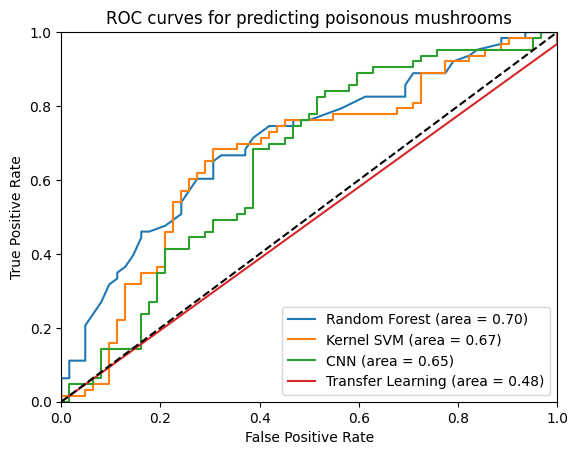

In [ ]:
plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_auc)
plt.plot(svm_fpr, svm_tpr, label='Kernel SVM (area = %0.2f)' % svm_auc)
plt.plot(cnn_fpr, cnn_tpr, label='CNN (area = %0.2f)' % cnn_auc)
plt.plot(tl_fpr, tl_tpr, label='Transfer Learning (area = %0.2f)' % tl_auc)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves for predicting poisonous mushrooms')
plt.legend(loc="lower right")
plt.show()